<a href="https://colab.research.google.com/github/Teasotea/IASA_IntellectualDecisionSupportSystems/blob/main/lab2/ISPPR_Lab2_datasetB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема: Навчання регресiйної моделi методами градiєнтного спуску в TensorFlow Основи API Keras (tf.keras). Використання tf.data – API Dataset.
### Варіант 20

Перед виконанням роботи розібрати код у наступній послідовності:

Розпаралелювання процесу навчання нейронних мереж в TensorFlow. 
Побудова нейромережевої моделі в TensorFlow 2 для класифікації та регресії. 
Основи API Keras (tf.keras)

1. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part1.py

2. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part2.py

3. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch13/ch13_part3.py

4. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part1.py

5. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part2.py

6. https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part3.py

Є версії ipynb: https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch13 
https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch14

Sebastian Raschka, Vahid Mirjalili. Python Machine Learning. Third Edition. Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2. Packt Publishing, 2019.



## Хiд виконання роботи

Написати програму, яка задає i навчає регресiйну модель методами градiєн-
тного спуску:

1. Завантажити початковi данi.
2. Представити данi графiчно.
3. Iнiцiалiзувати параметри: швидкiсть навчання, кiлькiсть епох (=100)к iлькiсть пакетiв i параметр регуляризацiї.
4. Iнiцiалiзувати вектор параметрiв.
5. Реалiзувати функцiю, яка задає модель, наприклад полiномiальну регресiю
6. Задати функцiю втрат: MSE з регуляризацiєю за нормами L1.
7. Задати операцiю, яка буде викликатися на кожнiй iтерацiї алгоритма мiнi-пакетного градiєнтного спуску
8. Виконати навчання моделi.
9. Виводити значення функцiї втрат через кожнi 10 епох.
10. Зберегти контрольнi точки через регулярнi iнтервали пiд час навчання. В кiнцi навчання зберегти результуючу модель. Вiдновити останню
контрольну точку при запуску, якщо навчання було перервано.
11. Налаштувати гiперпараметр швидкiсть навчання i додатково розмiр мiнi-пакета. Подивитися на форму кривої
навчання.
12. Дослiдити рiзнi значення параметра регуляризацiї i пiдiбрати найкраще
з них

13. Побудувати графiк з початковими даними та лiнiєю регресiї.


Згідно з варіантом: Полiномiальна регресiя, алгоритм градiєнтного спуску за мiнi-батчами,
MSE з регуляризацiєю за нормою L1.
Початковi данi:

(а) X_data = np.linspace(−1,1,100)
num_coef=5
coef =[ 10 , 20 , 3 , 40 , 5]
y_data=0
for i in range( num_coef ) :
y_data += coef[ i ] ∗ np.power(X_data, i )
y_data += np.random.randn(∗X_data.shape) ∗ 2.5

(б) sklearn.datasets.load_boston

# Завантажимо дані та представимо їх графічно

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import random

import pickle
import datetime 
import joblib
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y_data = raw_df.values[1::2, 2]

In [ ]:
df = pd.DataFrame(X_data)
df["Y"] = y_data

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


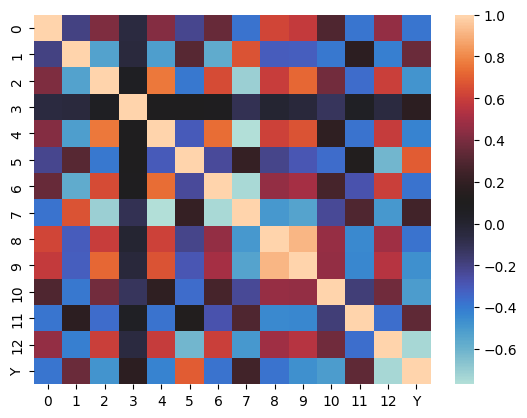

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, center = 0.1)
plt.show()

In [ ]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,Y
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
atr_names = list(df.columns[:-1])

fig = make_subplots(rows=13, cols=1, shared_xaxes=True, subplot_titles = (atr_names), vertical_spacing=0.02)
row = 1
for atr in df.columns[:-1]:
    fig.add_trace(go.Scatter(x=df[atr], y=df['Y'], mode='markers',
                             name=str(atr), line=dict(width=2)), row = row, col = 1)

    row += 1

fig.update_layout(width=1000, height=2700, title = "Графіки часових рядів")
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=42)

In [ ]:
print("Навчальна вибірка: ", X_train.shape, y_train.shape)
print("Тестова вибірка: ", X_test.shape, y_test.shape)

Навчальна вибірка:  (404, 13) (404,)
Тестова вибірка:  (102, 13) (102,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 # Побудова моделі, збереження чек-поінтів

Модель:
Авто-регресія з регуляризацією L1 та алгоритмом градiєнтного спуску за мiнi-батчами

Функція втрат:

$$ LOSS = \cfrac{1}{n} \sum \limits_{i = 1}^n \left(y_{true}^{(i)} - f(x^{(i)}) \right)^2 + \lambda \sum \limits_{i = 1}^{n} | w_i|$$


In [ ]:
# auto regression model with L1 regularization
model = SGDRegressor(loss = 'squared_error', penalty='l1', alpha=0.01, learning_rate='constant', eta0=0.01, max_iter=1000, random_state=42)

In [ ]:
train_losses = []
test_losses = []
train_sizes = []

In [ ]:
step = 10
save_checkpoint_interval = 10
checkpoint_dir = "Saved model"

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

for size in range(step, len(X_train_scaled) + 1, step):
    train_sizes.append(size)
    X_train_subset = X_train_scaled[:size]
    y_train_subset = y_train[:size]

    # Натренуємо модель, використовуючи міні-пакетний градієнтний спус
    model.partial_fit(X_train_subset, y_train_subset)

    train_loss = mean_squared_error(y_train_subset, model.predict(X_train_subset))
    test_loss = mean_squared_error(y_test, model.predict(X_test_scaled))

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Покажемо loss на кожній 10ій ітерації
    if size % save_checkpoint_interval == 0:
        print(f"Iteration: {size}/{len(X_train_scaled)}, Training Loss: {train_loss:.4f}")

    # Збережемо checkpoint-и моделі
    if size % save_checkpoint_interval == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f"model_checkpoint_{size}.joblib")
        joblib.dump(model, checkpoint_path)

Iteration: 10/404, Training Loss: 6.0889
Iteration: 20/404, Training Loss: 9.5859
Iteration: 30/404, Training Loss: 8.6257
Iteration: 40/404, Training Loss: 8.9520
Iteration: 50/404, Training Loss: 9.4837
Iteration: 60/404, Training Loss: 9.3338
Iteration: 70/404, Training Loss: 9.8068
Iteration: 80/404, Training Loss: 10.9865
Iteration: 90/404, Training Loss: 15.6684
Iteration: 100/404, Training Loss: 18.1125
Iteration: 110/404, Training Loss: 15.5718
Iteration: 120/404, Training Loss: 16.9512
Iteration: 130/404, Training Loss: 22.8122
Iteration: 140/404, Training Loss: 24.5969
Iteration: 150/404, Training Loss: 24.0927
Iteration: 160/404, Training Loss: 23.5975
Iteration: 170/404, Training Loss: 22.4389
Iteration: 180/404, Training Loss: 24.4973
Iteration: 190/404, Training Loss: 21.9507
Iteration: 200/404, Training Loss: 23.2136
Iteration: 210/404, Training Loss: 22.6820
Iteration: 220/404, Training Loss: 22.6255
Iteration: 230/404, Training Loss: 24.8848
Iteration: 240/404, Trainin

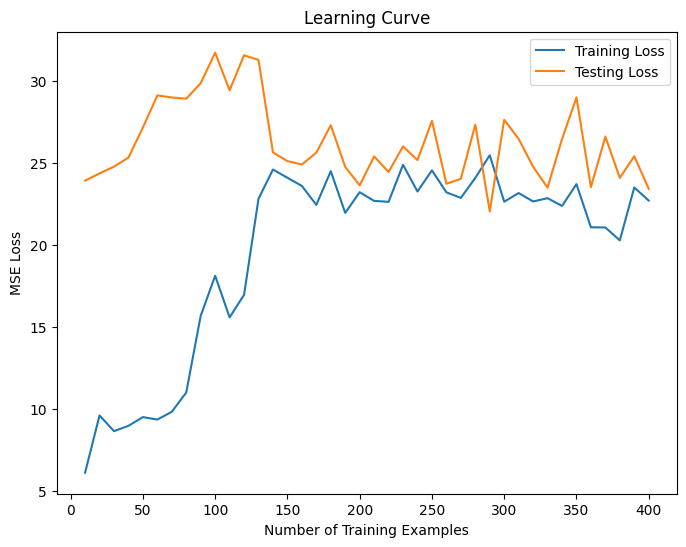

In [ ]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_losses, label='Training Loss')
plt.plot(train_sizes, test_losses, label='Testing Loss')
plt.xlabel('Number of Training Examples')
plt.ylabel('MSE Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MSE: 22.49101988204632
Testing MSE: 23.421322339277246


# Налаштування гіперпараметрів

Будемо налаштовувати такі параметри, як: `learning_rate`, `batch_size`

Напишемо власну функцію для рещітчастого пошуку

In [ ]:
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [8, 16, 32]

In [ ]:
train_losses = []
test_losses = []

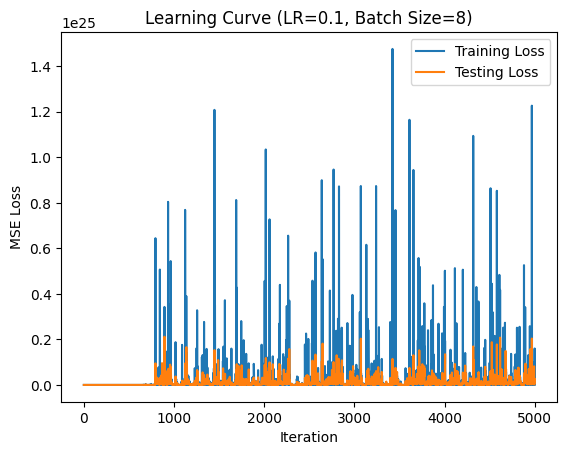

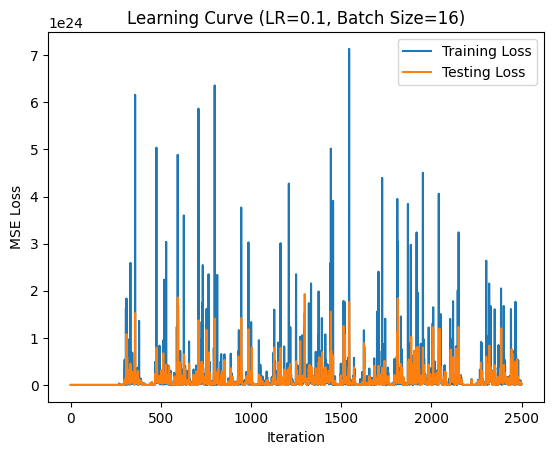

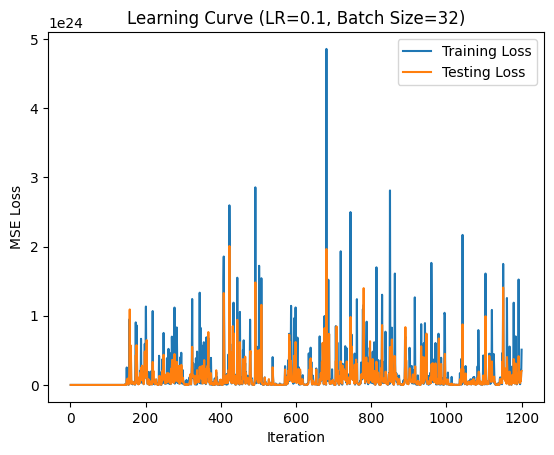

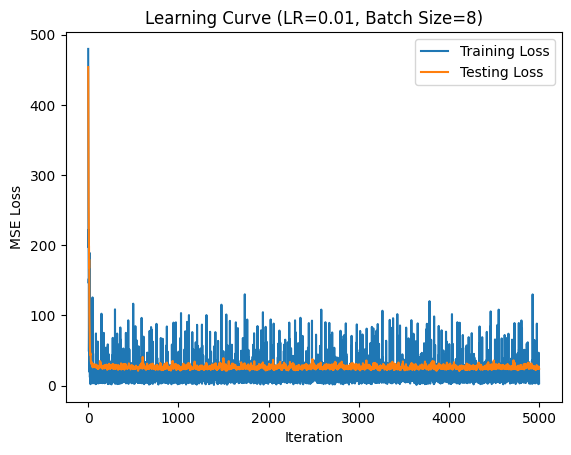

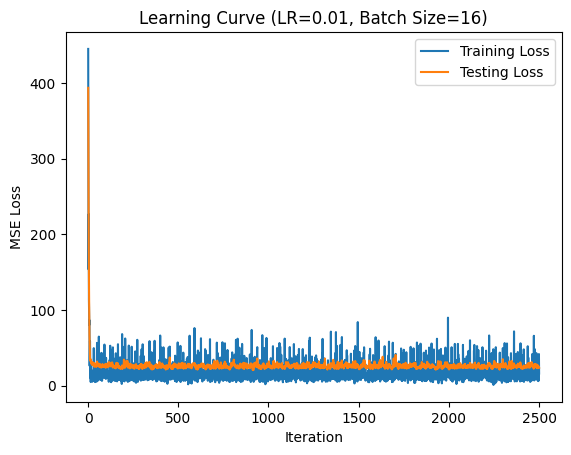

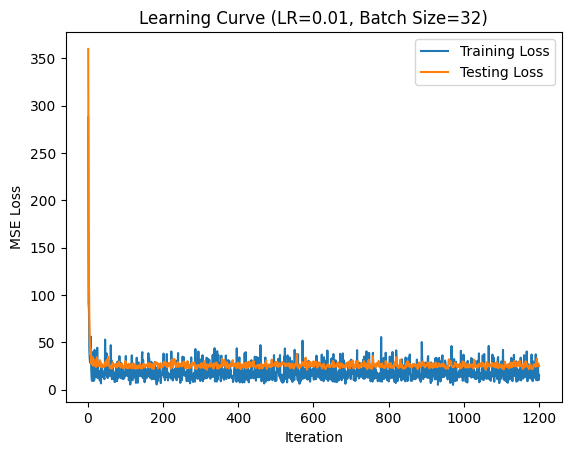

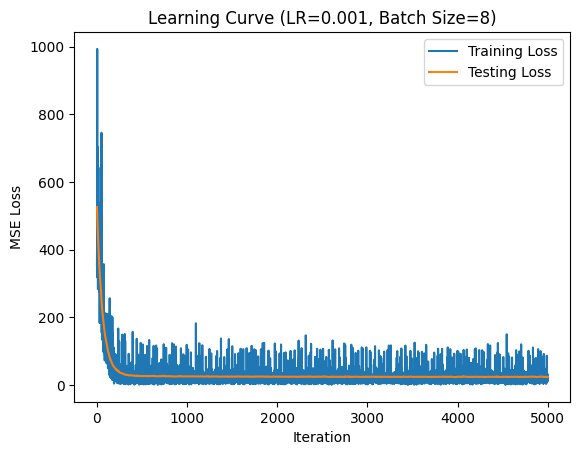

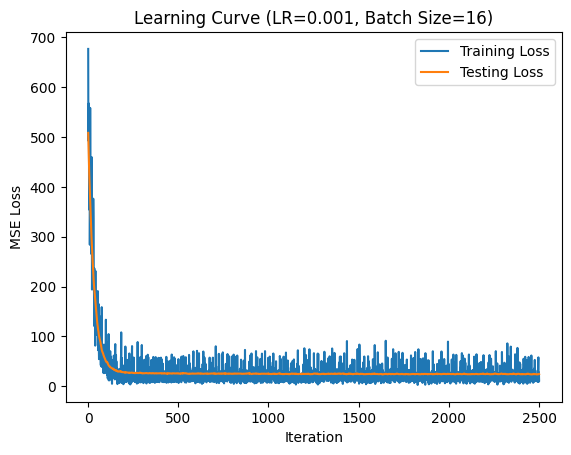

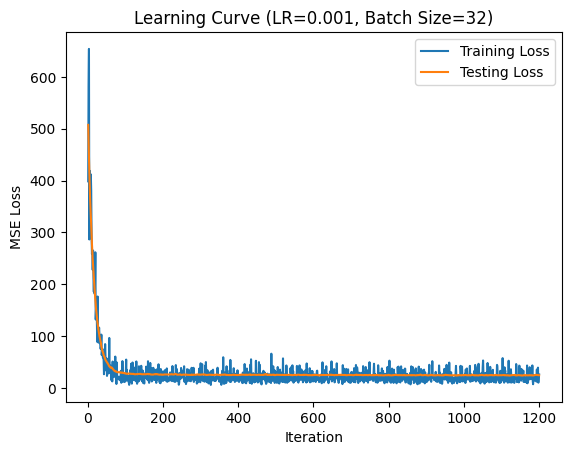

In [ ]:
# Будемо ітеруватися по різних комбінацієх гіперпараметрів
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        model = SGDRegressor(penalty='l1', alpha=0.01, learning_rate='constant', eta0=learning_rate, max_iter=1000, random_state=42)

        # Зберігатимемо тренувальні та тестові loss для кожної ітерації
        epoch_train_losses = []
        epoch_test_losses = []

        num_batches = len(X_train_scaled) // batch_size
        for epoch in range(100):
            # Будемо Shuffle-ити тренувальні дані
            indices = np.random.permutation(len(X_train_scaled))
            X_train_shuffled = X_train_scaled[indices]
            y_train_shuffled = y_train[indices]

            for i in range(num_batches):
                start_idx = i * batch_size
                end_idx = (i + 1) * batch_size
                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_shuffled[start_idx:end_idx]
                model.partial_fit(X_batch, y_batch)

                # Обчислимо тренувальні та тестові loss для кожної ітерації
                train_loss = mean_squared_error(y_batch, model.predict(X_batch))
                test_loss = mean_squared_error(y_test, model.predict(X_test_scaled))
                epoch_train_losses.append(train_loss)
                epoch_test_losses.append(test_loss)

        train_losses.append(epoch_train_losses[-1])
        test_losses.append(epoch_test_losses[-1])

        # Побудуємо криву навчання для кожної комбінації гіперпараметрів
        plt.plot(range(1, len(epoch_train_losses) + 1), epoch_train_losses, label='Training Loss')
        plt.plot(range(1, len(epoch_test_losses) + 1), epoch_test_losses, label='Testing Loss')
        plt.xlabel('Iteration')
        plt.ylabel('MSE Loss')
        plt.title(f'Learning Curve (LR={learning_rate}, Batch Size={batch_size})')
        plt.legend()
        plt.show()

In [ ]:
train_losses

[1.6566201026965393e+22,
 2.385397826825507e+22,
 5.0947090468264984e+23,
 3.515981594128422,
 16.25402571289897,
 15.226953772947176,
 21.309818380743245,
 11.511492671849552,
 25.90057436437141]

In [ ]:
np.argmin(test_losses), len(test_losses)

(4, 9)

In [ ]:
learning_rates, batch_sizes,

([0.1, 0.01, 0.001], [8, 16, 32])

Бачимо, що найкращий показник MSE (8.3347) дали параметри:

`learning_rate` = 0.01

`batch_size` = 8

# Підберемо найкращий параметр регуляризацiї

In [ ]:
model = SGDRegressor(penalty='l1', alpha=0.01, learning_rate='constant', eta0=learning_rate, max_iter=1000, random_state=42)

In [ ]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

# grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=SGDRegressor(alpha=0.01, eta0=0.001,
                                    learning_rate='constant', penalty='l1',
                                    random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'alpha': 0.01}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_loss = mean_squared_error(y_test, y_pred)
print("Test Loss:", test_loss)

Test Loss: 25.151068056871438
